In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_pickle('SongPKL.pkl')
data2 = pd.read_pickle("SongPKL_test.pkl")

In [3]:
SongData= pd.concat([data1,data2],ignore_index=True)
print(SongData.columns)
print(SongData.shape)

Index(['artist_7digitalid', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_mbid', 'artist_name', 'artist_playmeid', 'idx_artist_terms',
       'idx_similar_artists', 'release', 'release_7digitalid',
       'song_hotttnesss', 'song_id', 'title', 'track_7digitalid',
       'analysis_sample_rate', 'audio_md5', 'danceability', 'duration',
       'end_of_fade_in', 'energy', 'idx_bars_confidence', 'idx_bars_start',
       'idx_beats_confidence', 'idx_beats_start', 'idx_sections_confidence',
       'idx_sections_start', 'idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_max_time',
       'idx_segments_loudness_start', 'idx_segments_pitches',
       'idx_segments_start', 'idx_segments_timbre', 'idx_tatums_confidence',
       'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature',
       'ti

In [14]:
SongData.isnull().sum()

artist_7digitalid                    0
artist_familiarity                   0
artist_hotttnesss                    0
artist_id                            0
artist_latitude                   1907
artist_location                      0
artist_longitude                  1907
artist_mbid                          0
artist_name                          0
artist_playmeid                      0
idx_artist_terms                     0
idx_similar_artists                  0
release                              0
release_7digitalid                   0
song_hotttnesss                   1258
song_id                              0
title                                0
track_7digitalid                     0
analysis_sample_rate                 0
audio_md5                            0
danceability                         0
duration                             0
end_of_fade_in                       0
energy                               0
idx_bars_confidence                  0
idx_bars_start           

# Removing redundant columns

In [4]:
SongData.drop(['danceability','artist_latitude','artist_longitude','energy','artist_location','artist_id','artist_mbid','idx_artist_terms','idx_similar_artists','artist_7digitalid','title',
       'track_7digitalid','artist_playmeid','release','release_7digitalid','analysis_sample_rate', 'audio_md5','track_id','artist_name','song_id','idx_sections_confidence',
       'idx_sections_start','idx_bars_confidence', 'idx_bars_start','idx_beats_confidence', 'idx_beats_start','idx_segments_pitches','idx_segments_timbre','idx_segments_loudness_max_time','idx_tatums_confidence',
       'idx_tatums_start'],inplace=True,axis=1)

In [5]:
SongData=SongData[(SongData.song_hotttnesss!=0) & (SongData.song_hotttnesss.notna())]
print(SongData.shape)

(1303, 18)


In [6]:
SongData.song_hotttnesss

0        0.60212
4       0.604501
8       0.265861
11      0.265861
15      0.405116
          ...   
2993    0.257011
2995    0.334707
2996    0.444402
2998    0.375984
2999    0.457447
Name: song_hotttnesss, Length: 1303, dtype: object

In [7]:
SongData.columns

Index(['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss',
       'duration', 'end_of_fade_in', 'idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_start',
       'idx_segments_start', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence'],
      dtype='object')

In [111]:
# print(SongData[SongData['idx_bars_start'].shape[0] <=5])
def filter_arrays(arr):
    return len(arr) > 5
col_list = ['idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_start',
       'idx_segments_start']

# Apply the filter function to the specified column
SongData_clean = SongData
for col in col_list:
    SongData_clean = SongData_clean[SongData_clean[col].apply(filter_arrays)]
print(SongData_clean.shape)

(1303, 18)


In [112]:
new_rows={}
def change_array_to_columns(col,name):
    for row in col:
        count =0
        for entry in range(6):
            count+=1
            if name+'_'+str(count) in new_rows.keys():
                new_rows[name+'_'+str(count)].append(row[entry])
            else:

                new_rows[name+'_'+str(count)]=[]
                new_rows[name+'_'+str(count)].append(row[entry])
                
#         for entry in range(row.shape[0]-4,row.shape[0]):
#             count +=1
#             if name+'_'+str(count) in new_rows.keys():

#                 new_rows[name+'_'+str(count)].append(row[entry])
#             else:
#                 new_rows[name+'_'+str(count)]=[]
#                 new_rows[name+'_'+str(count)].append(row[entry])
            
col_list = ['idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_start',
       'idx_segments_start']

for col in col_list:
    change_array_to_columns(SongData_clean[col],col)
# change_array_to_columns(SongData_clean['idx_segments_start'],'idx_segments_start')

In [113]:
SongData_clean=SongData_clean.reset_index(drop=True)
SongData_clean.shape

(1303, 18)

In [155]:
print(pd.DataFrame(new_rows).shape)
print(SongData_clean.shape)
SongData_new =  pd.concat([SongData_clean,pd.DataFrame(new_rows)],axis =1)


SongData_new.drop(col_list,inplace=True,axis=1)
SongData_new.columns

(1303, 24)
(1303, 18)


Index(['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence',
       'idx_segments_confidence_1', 'idx_segments_confidence_2',
       'idx_segments_confidence_3', 'idx_segments_confidence_4',
       'idx_segments_confidence_5', 'idx_segments_confidence_6',
       'idx_segments_loudness_max_1', 'idx_segments_loudness_max_2',
       'idx_segments_loudness_max_3', 'idx_segments_loudness_max_4',
       'idx_segments_loudness_max_5', 'idx_segments_loudness_max_6',
       'idx_segments_loudness_start_1', 'idx_segments_loudness_start_2',
       'idx_segments_loudness_start_3', 'idx_segments_loudness_start_4',
       'idx_segments_loudness_start_5', 'idx_segments_loudness_start_6',
       'idx_segments_start_1', 'idx_segments_start_2', 'idx_segments_start_3',
       'idx_segments_start_4', 'idx_seg

In [156]:
SongData_new.shape

(1303, 38)

In [157]:
from sklearn.preprocessing import StandardScaler
cols = SongData_new.columns
scaler = StandardScaler()
SongData_new = scaler.fit_transform(SongData_new)

In [158]:
SongData_new = pd.DataFrame(SongData_new,columns=cols)

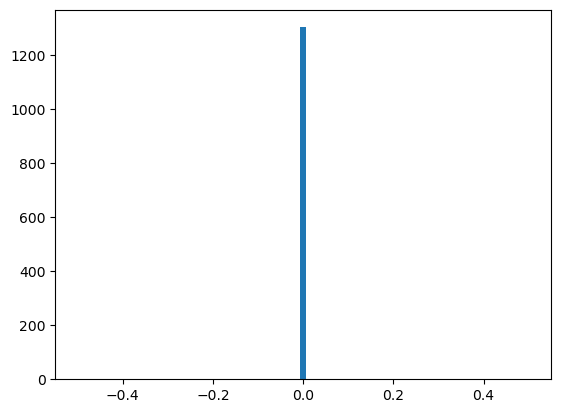

In [159]:
plt.hist(SongData_new.idx_segments_start_1,75)
plt.show()

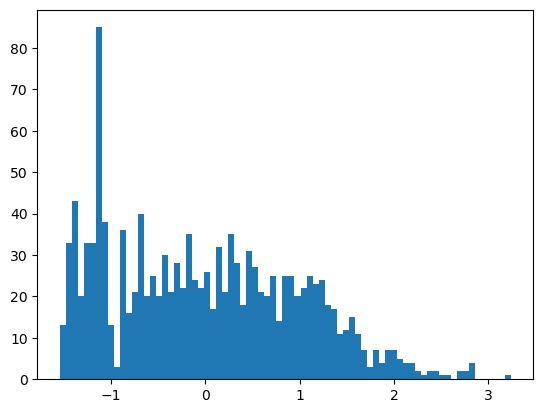

In [160]:
plt.hist(SongData_new.song_hotttnesss,75)
plt.show()

In [120]:
from sklearn.svm import SVR

In [121]:
model = SVR()

In [122]:
y = pd.Series(SongData_new["song_hotttnesss"])
X = SongData_new.drop(["song_hotttnesss"],axis = 1)

print(y.shape)
print(X.shape)

(1303,)
(1303, 37)


In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.3)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 987 to 1061
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   artist_familiarity             912 non-null    float64
 1   artist_hotttnesss              912 non-null    float64
 2   duration                       912 non-null    float64
 3   end_of_fade_in                 912 non-null    float64
 4   key                            912 non-null    float64
 5   key_confidence                 912 non-null    float64
 6   loudness                       912 non-null    float64
 7   mode                           912 non-null    float64
 8   mode_confidence                912 non-null    float64
 9   start_of_fade_out              912 non-null    float64
 10  tempo                          912 non-null    float64
 11  time_signature                 912 non-null    float64
 12  time_signature_confidence      912 non-null    float

In [124]:
model.fit(X_train,y_train)

SVR()

In [125]:
y_pred = model.predict(X_test)

In [104]:
print(type(pd.Series(y_pred)))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


-1.6989125318926823 2.273568309883805 -1.5386027986685518 2.8455548490524203


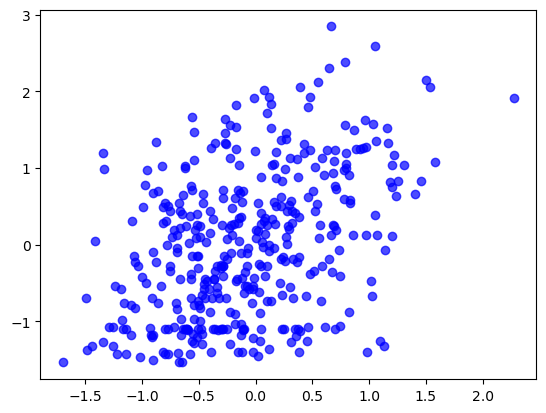

In [126]:
print(min(y_pred),max(y_pred),min(y_test),max(y_test))
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)

# plt.ylim([0, 1])
# plt.xlim([0,1])
plt.show()

In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mean_squared_score = mean_squared_error(y_pred, y_test)
print(mean_squared_score)

0.8171327124544151


In [128]:
r2_score(y_test, y_pred)

0.09625156064299445

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=1, kernel=sigmoid;, score=-22.811 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=1, kernel=sigmoid;, score=-19.165 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=1, kernel=sigmoid;, score=-23.291 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=1, kernel=sigmoid;, score=-22.469 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=1, kernel=sigmoid;, score=-19.163 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=1, kernel=poly;, score=-7.431 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=1, kernel=poly;

[CV 2/5] END ......C=1, gamma=0.1, kernel=poly;, score=-3.077 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.1, kernel=poly;, score=-4.179 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.1, kernel=poly;, score=-4.108 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.1, kernel=poly;, score=-1.807 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.303 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.299 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.244 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.194 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.219 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.273 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.120 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.182 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0

[CV 4/5] END ...C=10, gamma=0.001, kernel=poly;, score=-0.032 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.001 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.295 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.252 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.265 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.201 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.203 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.260 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.220 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.246 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.186 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.188 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0

[CV 1/5] END .....C=1000, gamma=1, kernel=poly;, score=-7.431 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=1, kernel=poly;, score=-7.131 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=1, kernel=poly;, score=-4.225 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=1, kernel=poly;, score=-4.650 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=1, kernel=poly;, score=-1.766 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.095 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.174 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.145 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.039 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.144 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, kernel=sigmoid;, score=-394575639.136 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, kernel=sigmoid;, score=-353011160.084 total time=   0.0s
[CV 3/5] END

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=3)

In [136]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=1, gamma=0.01)


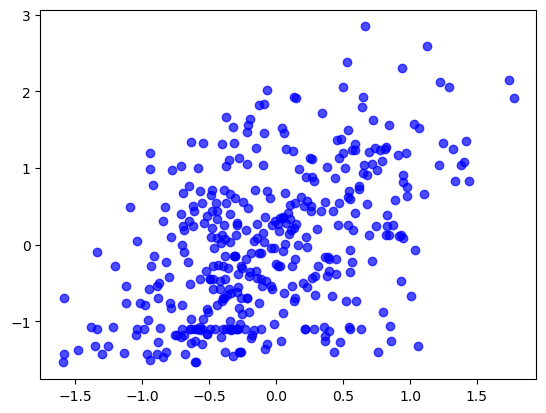

In [137]:
plt.scatter(pd.Series(grid.predict(X_test)),y_test,color='b',alpha=.7)
plt.show()

In [138]:
r2_score(y_test, grid.predict(X_test))

0.18053017085234302

In [139]:
mean_squared_score = mean_squared_error(grid.predict(X_test), y_test)
print(mean_squared_score)

0.7409314086809331


In [140]:
from sklearn.ensemble import AdaBoostRegressor

AdaB = AdaBoostRegressor()

AdaB.fit(X_train,y_train)

AdaBoostRegressor()

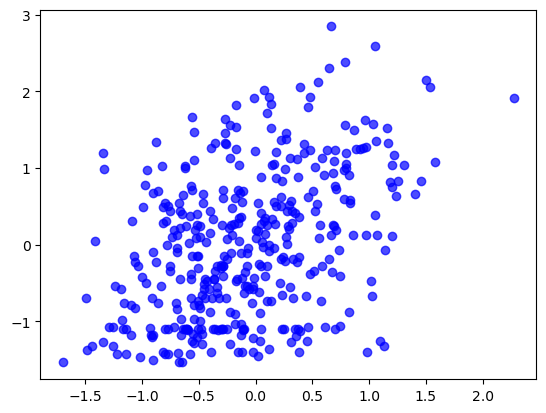

In [141]:
y_pred = model.predict(X_test)
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)

# plt.ylim([0, 1])
# plt.xlim([0,1])
plt.show()

In [145]:
param_grid = {
    'n_estimators':[25,50,125,150,500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
    'loss':['linear','exponential','square']
} 

grid = GridSearchCV(AdaBoostRegressor(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.283 total time=   0.2s
[CV 2/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.319 total time=   0.2s
[CV 3/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.232 total time=   0.2s
[CV 4/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.236 total time=   0.1s
[CV 5/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.182 total time=   0.2s
[CV 1/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.278 total time=   0.4s
[CV 2/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.324 total time=   0.4s
[CV 3/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.217 total time=   0.4s
[CV 4/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.233 total time=   0.4s
[CV 5/5] END learning_rate=0.0001, loss=linear, n_estimators=50;,

[CV 4/5] END learning_rate=0.001, loss=linear, n_estimators=50;, score=0.235 total time=   0.4s
[CV 5/5] END learning_rate=0.001, loss=linear, n_estimators=50;, score=0.228 total time=   0.4s
[CV 1/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.287 total time=   1.1s
[CV 2/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.332 total time=   1.2s
[CV 3/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.232 total time=   1.2s
[CV 4/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.244 total time=   1.1s
[CV 5/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.229 total time=   1.1s
[CV 1/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.289 total time=   1.4s
[CV 2/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.342 total time=   1.4s
[CV 3/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.227 total time=   1.4s
[CV 4/5] END learning_rate=0.001

[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.228 total time=   1.4s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.253 total time=   1.4s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.226 total time=   1.4s
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.286 total time=   4.7s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.313 total time=   4.7s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.234 total time=   4.7s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.246 total time=   4.7s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.212 total time=   4.8s
[CV 1/5] END learning_rate=0.01, loss=exponential, n_estimators=25;, score=0.278 total time=   0.2s
[CV 2/5] END learning_rate=0.01, loss=exponential, n_estimators=25;, score=0.319 total time=   0.2s
[CV 3/5] END learning_rate=0.01,

[CV 3/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.221 total time=   0.2s
[CV 4/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.247 total time=   0.2s
[CV 5/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.226 total time=   0.2s
[CV 1/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.287 total time=   0.4s
[CV 2/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.321 total time=   0.4s
[CV 3/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.240 total time=   0.4s
[CV 4/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.254 total time=   0.4s
[CV 5/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.216 total time=   0.4s
[CV 1/5] END learning_rate=0.1, loss=exponential, n_estimators=125;, score=0.274 total time=   1.0s
[CV 2/5] END learning_rate=0.1, loss=exponential, n_estimators=125;, score=0.286 total time=   1.0s
[CV 3/5]

[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.182 total time=   0.6s
[CV 4/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.203 total time=   0.7s
[CV 5/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.066 total time=   0.7s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.213 total time=   0.8s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.211 total time=   0.8s
[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.160 total time=   0.8s
[CV 4/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.186 total time=   0.8s
[CV 5/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.042 total time=   0.8s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=500;, score=0.202 total time=   2.4s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=500;, score=0.185 total time=   2.3s


GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['linear', 'exponential', 'square'],
                         'n_estimators': [25, 50, 125, 150, 500]},
             verbose=3)

In [147]:
print(grid.best_params_)
print(grid.best_estimator_)

{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 125}
AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=125)


In [148]:
print(r2_score(y_test, grid.predict(X_test)))
mean_squared_score = mean_squared_error(grid.predict(X_test), y_test)
print(mean_squared_score)

0.2547249349952938
0.6738475098504361


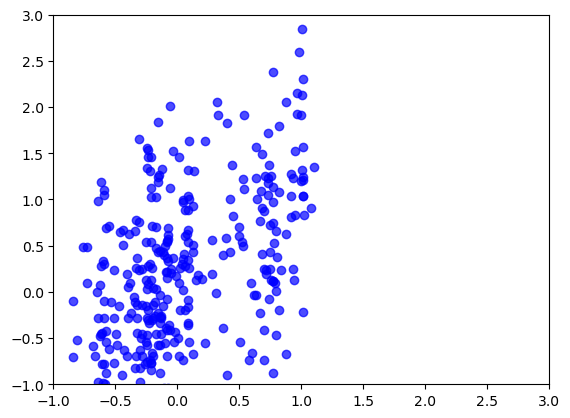

In [154]:
plt.scatter(pd.Series(grid.predict(X_test)),y_test,color='b',alpha=.7)
plt.ylim([-1,3])
plt.xlim([-1,3])
plt.show()

In [161]:
SVR_scale = SVR()
SVR_scale.fit(X_train,y_train)
y_pred = SVR_scale.predict(X_test)

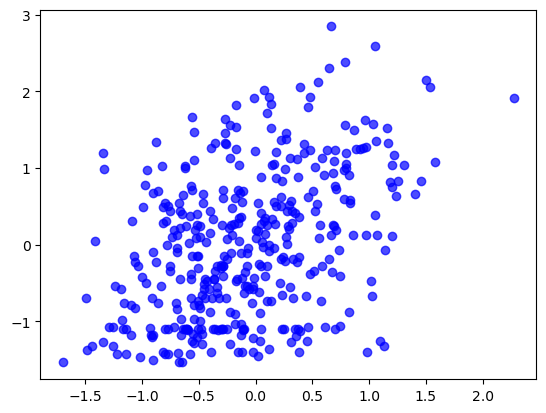

0.09625156064299445
0.8171327124544151


In [163]:
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)
plt.show()

print(r2_score(y_test, y_pred))
mean_squared_score = mean_squared_error(y_pred, y_test)
print(mean_squared_score)

In [164]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid_scale = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

grid_scale.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.056 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.070 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.070 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.020 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.075 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.253 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.095 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.174 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.145 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.039 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.144 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.965 total time=   0.2s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.678 total time=   0.2s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.781 total time=   0.2s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.887 total time=   0.2s
[CV 5/5] END ...C=1000, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

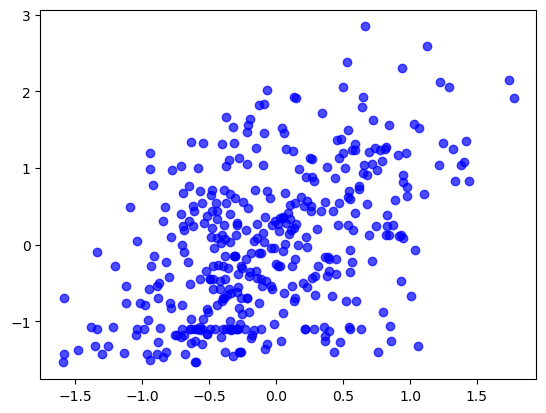

0.18053017085234302
0.7409314086809331


In [165]:
plt.scatter(pd.Series(grid_scale.predict(X_test)),y_test,color='b',alpha=.7)
plt.show()

print(r2_score(y_test, grid_scale.predict(X_test)))
mean_squared_score = mean_squared_error(grid_scale.predict(X_test), y_test)
print(mean_squared_score)